NLP has the goal of deriving information out of natural language (could be sequence of text or speech)

Common term of NLP - seq2seq 

In [1]:
# VALIDATE WHETHER NECESSARY DRIVERS ARE INSTALLED.
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5102e454-c004-66f2-7c05-823d3536e342)


In [2]:
# TASK 1: Loading libraries

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import zipfile
import os
import datetime
import pandas as pd

#Get the dataset

In [3]:
# TASK 2: Getting dataset from kaggle
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-04-10 18:01:11--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2023-04-10 18:01:11 (39.8 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
# TASK 3: Unzip the data

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [5]:
# TASK 4: STORE THE DATA IN A VARIABLE
unzip_data = unzip_data("nlp_getting_started.zip")

# Visualize the Data

In [6]:
# TASK 5: LOAD THE TRAIN AND TEST DATA

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [7]:
# TASK 6: VISUALIZE THE TRAIN DATASET
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# TASK 7: THE ENTIRE TRAIN DATAFRAME ROWS ARE SHUFFLED USING SAMPLE METHOD.(helps reduce bias or patterns if present)
train_df_shuffled = train_df.sample(frac =1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# TASK 8: COUNT THE UNIQUE VALUES IN THE TARGET COLUMN.
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# TASK 9: COUNT NO. OF OBSERVATIONS TAKEN FOR TRAIN AND TEST DATA.
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# TASK 10: SPLIT DATA INTO TRAIN AND VALIDATION SET.

from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [12]:
# TASK 10: LENGTH OF ARRAYS AFTER SPLITTING TRAINING DATA INTO TRAIN AND VALIDATION SET
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

# Convert text into numerical values - TOKENIZATION , EMBEDDING & TEXT VECTORIZATION

In [13]:
# TASK 11: FIND MAXIMUM TOKENS

round(sum(len(l.split()) for l in train_sentences))

102087

In [14]:
# TASK 12: FIND OUTPUT_SEQUENCE LENGTH

round(sum(len(l.split()) for l in train_sentences)/len(train_sentences))

15

In [15]:
# TASK 13: TEXT VECTORIZATION USING DEFAULT PARAMETERS
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = 15)

In [16]:
#TASK 14: COMPUTE VOCABULARY AND FREQUENCY STATISTICS 
text_vectorizer.adapt(train_sentences)

In [17]:
# TASK 15: GET UNIQUE WORDS IN THE VOCABULARY
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

#Embedding layer

In [18]:
# TASK 16: CREATE EMBEDDING LAYER
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128,
                             input_length = 15)

# **Models**

1. Naive Bayes with TF-IDF Encoder (baseline)
2. Feed-Forward Neural Network (dense Model)
3. LSTM (RNN)
4. GRU (RNN)
5. Bidirectional -LSTM (RNN)
6. 1D Convolutional Neural Network
7. Tensorflow Hub Pretained Feature Extractor
8. Tensorflow Hub Pretrained Feature Extractor (10% of Data)

## **Steps in Modelling**
1. Create a model
2. Build a model
3. Fit a model
4. Evaluate a model

# Model 1 - Naive Bayes - Baseline Model


In [19]:
#TASK 17: IMPORT NAIVE BAYES PACKAGES
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [20]:
# TASK 18: CRAETE TOKENIZATION AND MODELLING PIPELINE
model_0 = Pipeline([("tfidf", TfidfVectorizer()), ("clf", MultinomialNB()) ])

In [21]:
#TASK 19: FIT THE PIPELINE
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [22]:
#TASK 20: RUN THE PREDICTION FOR NAIVE BAYES MODEL
baseline_preds = model_0.predict(val_sentences)

In [23]:
# TASK 21: CREATING AN EVALUATION FUNCTION FOR THE MODEL EXPERIENCE.

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy, "precision": model_precision, "recall": model_recall, "f1": model_f1}
  return model_results


In [24]:
# TASK 22: PRINT THE NAIVE BAYES RESULTS
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 2 - Feed Forward Neural Network (A Simple Dense Model)


In [25]:
# TASK 23: BUILD MODEL WITH FUNCTIONAL API AND ONE WITH VECTORIZED TEXT LAYER  
model_2 = tf.keras.models.Sequential(name = "model_1_dense")
model_2.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_2.add(text_vectorizer)
model_2.add(embedding)
model_2.add(tf.keras.layers.GlobalMaxPool1D())
model_2.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [26]:
# TASK 24: REPORT THE SUMMARY OF FEED FORWARD NEURAL NETWORK MODEL
model_2.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [27]:
# TASK 25: COMPILE THE FEED FORWARD NEURAL NETWORK MODEL
model_2.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# TASK 26: FIT THE FEED FORWARD NEURAL NETWORK MODEL
model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 29s 92ms/step - loss: 0.6414 - accuracy: 0.6490 - val_loss: 0.5786 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4723 - accuracy: 0.8237 - val_loss: 0.4779 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3445 - accuracy: 0.8726 - val_loss: 0.4575 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2612 - accuracy: 0.9066 - val_loss: 0.4617 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2002 - accuracy: 0.9315 - val_loss: 0.4747 - val_accuracy: 0.7808


In [28]:
# TASK 27: RUN THE PREDICTION FOR FORWARD NEURAL NETWORK MODEL
model_2_pred_prob = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_prob))



24/24 [==============================] - 0s 2ms/step


In [29]:
#TASK 28: PRINT THE FORWARD NEURAL NETWORK MODEL RESULTS
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7861251265484451,
 'recall': 0.7808398950131233,
 'f1': 0.7775280856169867}

Visualizing word embeddings

In [30]:
# TASK 29: GET VOCABULARY FOR TEXT VECTORIZATION LAYER
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:20]

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this']

In [31]:
# TASK 30: GET WEIGHT MATRIX OF EMBEDDING LAYER.(These are the numerical representations of each token in our training data)
embed_weights = model_2.get_layer("embedding").get_weights()


In [32]:
embed_weights

[array([[-0.0474339 , -0.04669647,  0.03265423, ..., -0.06183434,
          0.12909684, -0.03683797],
        [-0.0443836 , -0.03364158,  0.09535538, ..., -0.05356892,
          0.111007  , -0.05532487],
        [-0.03726501, -0.02981702, -0.04350636, ..., -0.03795834,
         -0.01982145, -0.02935583],
        ...,
        [ 0.04900439,  0.03474971, -0.04659216, ...,  0.00595612,
         -0.02293397, -0.04922781],
        [ 0.02926738, -0.00396127,  0.04060893, ..., -0.04868818,
         -0.04663273,  0.00470752],
        [-0.04311817, -0.02426872,  0.03500657, ..., -0.03267614,
          0.01374184, -0.0437803 ]], dtype=float32)]

In [33]:
# TASK 31: SHAPE OF EMBEDDING LAYER MATRIX.
embed_weights[0].shape

(10000, 128)

# Model - 3 LSTM (RNN) 

In [34]:
# TASK 32: BUILD MODEL FOR RNN MODEL USING LSTM
from tensorflow.keras import layers
model_3 = tf.keras.models.Sequential(name = "model_3_dense")
model_3.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_3.add(text_vectorizer)
model_3.add(embedding)
#model_2.add(tf.keras.layers.LSTM(64, return_sequences = True))
model_3.add(tf.keras.layers.LSTM(64))
model_3.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [35]:
#TASK 33: REPORT THE SUMMARY OF RNN MODEL USING LSTM
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [36]:
# TASK 34: COMPILE RNN MODEL USING LSTM
model_3.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [37]:
#TASK 35: FIT THE RNN MODEL USING LSTM
model_3_history = model_3.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 17s 62ms/step - loss: 0.3780 - accuracy: 0.8313 - val_loss: 0.5219 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2437 - accuracy: 0.9048 - val_loss: 0.5085 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1743 - accuracy: 0.9369 - val_loss: 0.5815 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1350 - accuracy: 0.9514 - val_loss: 0.6416 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1019 - accuracy: 0.9626 - val_loss: 0.9651 - val_accuracy: 0.7638


In [38]:
# TASK 36: RUN THE PREDICTION FOR RNN MODEL USING LSTM
model_3_pred_prob = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_prob))

24/24 [==============================] - 0s 3ms/step


In [39]:
#TASK 37: PRINT THE RNN MODEL USING LSTM RESULTS
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 76.37795275590551,
 'precision': 0.765729922717656,
 'recall': 0.7637795275590551,
 'f1': 0.7613639638656104}

# Model - 4 GRU (RNN) 

In [40]:
# TASK 38: BUILD MODEL FOR RNN MODEL USING GRU
model_4 = tf.keras.models.Sequential(name = "model_4_dense")
model_4.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_4.add(text_vectorizer)
model_4.add(embedding)
model_4.add(tf.keras.layers.GRU(64, return_sequences = True))
model_4.add(tf.keras.layers.GRU(64))
model_4.add(tf.keras.layers.Dense(1, activation = "sigmoid"))


In [41]:
#TASK 39: REPORT THE SUMMARY OF RNN MODEL USING GRU
model_4.summary()

Model: "model_4_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,342,273
Trainable params: 1,342,273
Non-trainable params: 0
___________________________________________

In [42]:
# TASK 40: COMPILE RNN MODEL USING GRU
model_4.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [43]:
#TASK 41: FIT THE RNN MODEL USING GRU
model_4_history = model_4.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 17s 59ms/step - loss: 0.1886 - accuracy: 0.9259 - val_loss: 0.7010 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1020 - accuracy: 0.9647 - val_loss: 0.7971 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0783 - accuracy: 0.9717 - val_loss: 0.9814 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0654 - accuracy: 0.9753 - val_loss: 1.2784 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0570 - accuracy: 0.9758 - val_loss: 1.1803 - val_accuracy: 0.7598


In [44]:
# TASK 42: RUN THE PREDICTION FOR RNN MODEL USING GRU
model_4_pred_prob = model_4.predict(val_sentences)
model_4_preds = tf.squeeze(tf.round(model_4_pred_prob))

24/24 [==============================] - 1s 3ms/step


In [45]:
# TASK 43: PRINT THE RNN MODEL USING GRU RESULTS
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.98425196850394,
 'precision': 0.7604578907479682,
 'recall': 0.7598425196850394,
 'f1': 0.758116023760764}

# Model - 5 Bidirectional LSTM (RNN)


In [46]:
#TASK 44: BUILD MODEL FOR RNN USING BIDIRECTIONAL LSTM
model_5 = tf.keras.models.Sequential(name = "model_5_bidirectional")
model_5.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_5.add(text_vectorizer)
model_5.add(embedding)
model_5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model_5.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [47]:
#TASK 45: REPORT THE SUMMARY OF RNN MODEL USING BIDIRECTIONAL LSTM.
model_5.summary()

Model: "model_5_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [48]:
# TASK 46: COMPILE RNN MODEL USING BIDIRECTIONAL LSTM.
model_5.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [49]:
#TASK 47: FIT THE RNN MODEL USING BIDIRECTIONAL LSTM.
model_5_history = model_5.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 20s 73ms/step - loss: 0.1345 - accuracy: 0.9504 - val_loss: 1.0285 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0595 - accuracy: 0.9759 - val_loss: 1.2614 - val_accuracy: 0.7520
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0559 - accuracy: 0.9745 - val_loss: 1.2072 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0479 - accuracy: 0.9777 - val_loss: 1.4227 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0476 - accuracy: 0.9799 - val_loss: 1.3863 - val_accuracy: 0.7651


In [50]:
# TASK 48: RUN THE PREDICTION FOR RNN MODEL USING BIDIRECTIONAL LSTM.
model_5_pred_prob = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_prob))

24/24 [==============================] - 2s 6ms/step


In [51]:
#TASK 49: PRINT THE RNN MODEL USING BIDIRECTIONAL LSTM RESULTS.
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 76.50918635170603,
 'precision': 0.769637074539757,
 'recall': 0.7650918635170604,
 'f1': 0.7615420797930578}

# Convolutional Neural Networks for Text

#Model 6

Inputs -> Tokensization -> Embedding -> (conv1d+pooling) layers -> output

In [52]:
#TASK 50: BUILD MODEL FOR CNN MODEL

model_6 = tf.keras.models.Sequential(name = "model_6_CNN")
model_6.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model_6.add(text_vectorizer)
model_6.add(embedding)
model_6.add(tf.keras.layers.Conv1D(filters = 128, kernel_size=5, strides=1, activation = "relu", padding = "valid"))
model_6.add(tf.keras.layers.GlobalMaxPool1D())
model_6.add(tf.keras.layers.Dense(64, activation = "relu"))
model_6.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

In [53]:
#TASK 51: REPORT THE SUMMARY OF CNN MODEL 
model_6.summary()

Model: "model_6_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           82048     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 

In [54]:
# TASK 52: COMPILE CNN MODEL 
model_6.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [55]:
# TASK 53: FIT CNN MODEL
model_6_history = model_5.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0425 - accuracy: 0.9803 - val_loss: 1.5261 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0366 - accuracy: 0.9825 - val_loss: 1.5682 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0344 - accuracy: 0.9837 - val_loss: 1.5457 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0365 - accuracy: 0.9823 - val_loss: 1.6790 - val_accuracy: 0.7415
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0320 - accuracy: 0.9845 - val_loss: 1.8644 - val_accuracy: 0.7559


In [56]:
# TASK 54: RUN THE PREDICTION FOR CNN MODEL 
model_6_pred_prob = model_6.predict(val_sentences)
model_6_preds = tf.squeeze(tf.round(model_6_pred_prob))

24/24 [==============================] - 3s 4ms/step


In [57]:
# TASK 55: PRINT THE CNN MODEL RESULTS
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 51.96850393700787,
 'precision': 0.38080547308635604,
 'recall': 0.5196850393700787,
 'f1': 0.38428835139063117}

# Model 7 - Tensorflow Hub Pretrained Sentence Encoder

Inputs -> Embedding layer (USE from TensforFlow Hub) -> Dense Layer(Decodes the sequences into desired output) -> Outputs 

In [58]:
# TASK 56: LOAD PRETRAINED SENTENCE ENCODER
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

In [59]:
#TASK 57: PRINT SHAPE SAMPLE EMBEDDINGS 

print(embeddings[0].shape)

(512,)


**Using Transfer Learning for NLP, specially using tensorflow Hub's universal sentence encoder**

In [60]:
# TASK 58: CREATE A MODEL USING TENSORFLOW'S SENTENCE ENCODER
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE"
                                        )


In [61]:
# TASK 60: BUILD THE MODEL BY ADDING APPROPRIATE LAYERS TO SENTENCE ENCODER MODEL
model_7 = tf.keras.models.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
], name = "model_7_USE")

In [62]:
# TASK 61: COMPILE THE UNIVERSAL SENTENCE ENCODER MODEL
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [63]:
#TASK 62: REPORT SUMMARY OF UNIVERSAL SENTENCE ENCODER MODEL
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [64]:
# TASK 63: FIT THE UNIVERSAL SENTENCE ENCODER MODEL
model_7_history = model_7.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 15,
                              validation_data = (val_sentences, val_labels))

Epoch 1/15
215/215 [==============================] - 6s 14ms/step - loss: 0.4879 - accuracy: 0.7875 - val_loss: 0.4470 - val_accuracy: 0.7979
Epoch 2/15
215/215 [==============================] - 3s 13ms/step - loss: 0.4088 - accuracy: 0.8180 - val_loss: 0.4307 - val_accuracy: 0.8110
Epoch 3/15
215/215 [==============================] - 4s 17ms/step - loss: 0.3957 - accuracy: 0.8251 - val_loss: 0.4253 - val_accuracy: 0.8150
Epoch 4/15
215/215 [==============================] - 3s 12ms/step - loss: 0.3835 - accuracy: 0.8305 - val_loss: 0.4230 - val_accuracy: 0.8189
Epoch 5/15
215/215 [==============================] - 2s 11ms/step - loss: 0.3745 - accuracy: 0.8339 - val_loss: 0.4329 - val_accuracy: 0.8163
Epoch 6/15
215/215 [==============================] - 3s 12ms/step - loss: 0.3639 - accuracy: 0.8389 - val_loss: 0.4328 - val_accuracy: 0.8110
Epoch 7/15
215/215 [==============================] - 3s 15ms/step - loss: 0.3542 - accuracy: 0.8485 - val_loss: 0.4221 - val_accuracy: 0.8281

In [65]:
# TASK 64: RUN THE PREDICTION FOR UNIVERSAL SENTENCE ENCODER MODEL
model_7_pred_prob = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_prob))

24/24 [==============================] - 1s 9ms/step


In [66]:
# TASK 65: PRINT THE UNIVERSAL SENTENCE ENCODER MODEL RESULTS
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 82.02099737532808,
 'precision': 0.8226273514784717,
 'recall': 0.8202099737532809,
 'f1': 0.8187283797448478}

# Model 7: TF HUb Pretrained USE but with 10% of the data

In [67]:
# TASK 66: SPLIT 10% TRAINING DATA FOR TF - UNIVERSAL SENTENCE ENCODER MODEL
train_10_percent_split = int(len(train_sentences)*0.10)
train_sentences_10_percent =  train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [68]:
# TASK 67: CLONE THE MODEL 7 ABOVE.
model_8 = tf.keras.models.clone_model(model_7)


In [69]:
# TASK 68: COMPILE THE 10% TF-USE MODEL.
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [70]:
# TASK 69: REPORT THE SUMMARY OF 10% TF-USE MODEL.
model_8.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [71]:
# TASK 70: FIT THE 10% TF-USE MODEL
model_8_history = model_8.fit(x = train_sentences_10_percent,
                              y = train_labels_10_percent,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 5s 86ms/step - loss: 0.6587 - accuracy: 0.7460 - val_loss: 0.6299 - val_accuracy: 0.7493
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5629 - accuracy: 0.8102 - val_loss: 0.5541 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.4739 - accuracy: 0.8292 - val_loss: 0.5049 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4159 - accuracy: 0.8321 - val_loss: 0.4866 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.3806 - accuracy: 0.8438 - val_loss: 0.4838 - val_accuracy: 0.7808


In [72]:
# TASK 71: RUN THE PREDICTION FOR 10% TF-USE MODEL. 
model_8_pred_prob = model_8.predict(val_sentences)
model_8_preds = tf.squeeze(tf.round(model_8_pred_prob))

24/24 [==============================] - 1s 9ms/step


In [73]:
# TASK 72:PRINT THE 10% TF-USE MODEL.
model_8_results = calculate_results(val_labels, model_8_preds)
model_8_results

{'accuracy': 78.08398950131233,
 'precision': 0.781486692298758,
 'recall': 0.7808398950131233,
 'f1': 0.7794817733933848}

#Comparing the results of the models

In [74]:
# TASK 73: STORE ALL MODEL'S RESULT IN A DATAFRAME 
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "Simple_dense_model": model_2_results,
                                  "LSTM":model_3_results,
                                  "GRU": model_4_results,
                                  "LSTM-Bidirectional": model_5_results,
                                  "Conv_1D": model_6_results,
                                  "TF HUB USE Encoder": model_7_results,
                                  "TF HUB USE Encoder_10%": model_8_results
                                  })


In [75]:
# TASK 74: TRANSPOSE THE DATAFRAME
all_model_results = all_model_results.transpose()

In [76]:
# TASK 75: UPDATE THE ACCURACY COLUMN VALUES BY DIVIDING THEM BY 100.
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [77]:
# TASK 76: COMPARISON OF MODEL'S RESULT
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
Simple_dense_model,0.780840,0.786125,0.780840,0.777528
LSTM,0.763780,0.765730,0.763780,0.761364
GRU,0.759843,0.760458,0.759843,0.758116
LSTM-Bidirectional,0.765092,0.769637,0.765092,0.761542
Conv_1D,0.519685,0.380805,0.519685,0.384288
TF HUB USE Encoder,0.820210,0.822627,0.820210,0.818728
TF HUB USE Encoder_10%,0.780840,0.781487,0.780840,0.779482


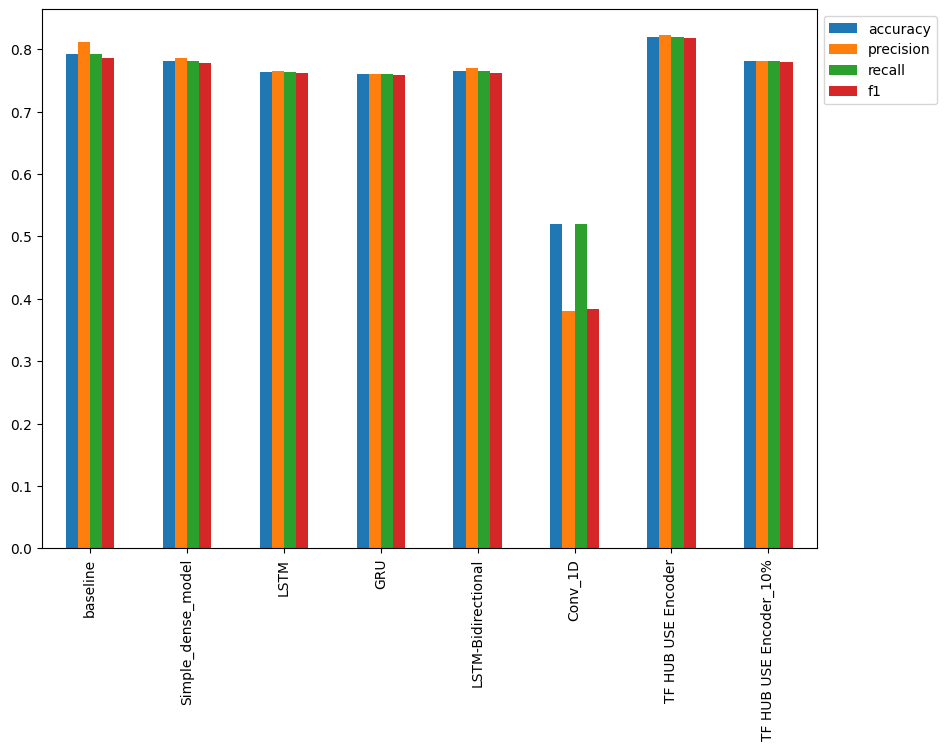

In [78]:
# TASK 77: PLOT THE RSULTS OF ALL MODELS
all_model_results.plot(kind = "bar",figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))